## Spotify API Exploration


### Spotify Access Token
- request access token with POST request
- Need to re-run every hour due to token expiration

In [1]:
import os
import requests

import pandas as pd
import numpy as np

# data-science packages
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.cluster import KMeans

# visualization
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [ ]:
def spotify_access_token():

    global access_token, headers, BASE_URL

    AUTH_URL = 'https://accounts.spotify.com/api/token'
    CLIENT_ID = os.getenv('SPOTIFY_CLIENT_ID')
    CLIENT_SECRET = os.getenv('SPOTIFY_SECRET')
    
    # POST
    auth_response = requests.post(AUTH_URL, {
        'grant_type': 'client_credentials',
        'client_id': CLIENT_ID,
        'client_secret': CLIENT_SECRET,
        }).json()

    # established globally:
    access_token = auth_response['access_token']
    
    for k, v in auth_response.items():
        print(f'{k}: {v}')

    headers = {
    'Authorization': f'Bearer {access_token}'
    }

    BASE_URL = 'https://api.spotify.com/v1/'

spotify_access_token()

### Track Features

- acousticness
    - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- danceability
    - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- duration_ms
    - The duration of the track in milliseconds.

- energy
    - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

- instrumentalness
    - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- key
    - The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
    - Range: -1 - 11

- liveness
    - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- loudness
    - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

- mode
    - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- speechiness
    - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

- tempo
    - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- time_signature
    - An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
    - Range: 3 - 7

- valence
    - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [3]:
def artist(id):
    
    artist_details = requests.get(
        f'{BASE_URL}artists/{id}',
        headers=headers
    ).json()

    return artist_details

ds = artist('05MlomiA9La0OiNIAGqECk')

ds_df = pd.DataFrame()
for k, v in ds.items():
    ds_df[k] = [v]

ds_df


,external_urls,followers,genres,href,id,images,name,popularity,type,uri
0,{'spotify': 'https://open.spotify.com/artist/0...,"{'href': None, 'total': 82633}","[brighton indie, british math rock, math pop, ...",https://api.spotify.com/v1/artists/05MlomiA9La...,05MlomiA9La0OiNIAGqECk,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Delta Sleep,41,artist,spotify:artist:05MlomiA9La0OiNIAGqECk


In [4]:
def track_features(track_id, year=None):
    
    features = {}

    track_details = requests.get(
        f'{BASE_URL}tracks/{track_id}',
        headers=headers
        ).json()
    
    # adding artist and track_name to audio-features results
    features['artist'] = track_details.get('artists')[0].get('name')

    features['track_name'] = track_details.get('name')

    audio_features = requests.get(
        f'{BASE_URL}audio-features/{track_id}', 
        headers=headers
        ).json()

    features.update(audio_features)

    return features, year

ds_tracks = track_features('3Y2wHKbmVFQK7Br1EfzKGY')[0]

ds_df2 = pd.DataFrame()
for k, v in ds_tracks.items():
    ds_df2[k] = [v]

ds_df2.T

,0
artist,Delta Sleep
track_name,El Pastor
danceability,0.298
energy,0.731
key,2
loudness,-7.52
mode,1
speechiness,0.079
acousticness,0.00879
instrumentalness,0.00145


### Audio Analysis
- Takes a single song and gives analysis for the entire song from start to finish. This includes confidence levels for the above stats.

In [5]:
def audio_analysis(track_id):
        
    features = {}

    track_details = requests.get(
        BASE_URL + 'tracks/' + track_id,
        headers=headers
        ).json()
    
    # adding artist and track_name to audio-features results
    features['artist'] = track_details.get('artists')[0].get('name')

    features['track_name'] = track_details.get('name')

    audio_analysis = requests.get(
        f'{BASE_URL}audio-analysis/{track_id}', 
        headers=headers
        ).json()

    features.update(audio_analysis)

    return features.get('track')

pd.DataFrame([audio_analysis('3Y2wHKbmVFQK7Br1EfzKGY')]).T

,0
num_samples,6836528
duration,310.04663
sample_md5,
offset_seconds,0
window_seconds,0
analysis_sample_rate,22050
analysis_channels,1
end_of_fade_in,0.0
start_of_fade_out,307.85016
loudness,-7.52


### Get List of Albums

In [6]:
def get_albums(artist_id):
    
    album_details = requests.get(
        f'{BASE_URL}artists/{artist_id}/albums', 
        headers=headers,
        params={'include_groups': 'album', 'limit': 50}
        ).json()

    try:
        album_data = pd.DataFrame(
            album_details.get('items')
            )[['name','release_date','total_tracks','type','id']].to_dict()
        
    except:
        album_data = dict()

    return album_data

pd.DataFrame(get_albums('05MlomiA9La0OiNIAGqECk'))  

,name,release_date,total_tracks,type,id
0,Spring Island,2021-11-12,12,album,4JeLdGuCEO9SF9SnFa9LBh
1,Soft Sounds,2020-07-31,10,album,3DLLrOiGk1kUjFpSCqz3q4
2,Ghost City,2018-08-10,11,album,63PgGSb6ZkwPVfMZVOhObO
3,Twin Galaxies,2015-07-08,11,album,1bcWJMGRvDhvKHNmQmTTCd
4,Management,2013-05-20,7,album,4vsD6pgRkIAnHYxeTUMHbw


### Get Album Features

In [7]:
def album_features(album_id):

    album_features = requests.get(
        f'{BASE_URL}albums/{album_id}/tracks', 
        headers = headers,
        params = {'limit': 50}
        ).json()

    album_features_df = pd.DataFrame(
        album_features.get('items')
        )[['name','track_number','id']]
    
    return album_features_df.to_dict()

pd.DataFrame(album_features('4JeLdGuCEO9SF9SnFa9LBh'))

,name,track_number,id
0,Water Fall,1,5cRgPReB3My4BKAxVAkK7i
1,The Detail,2,1ExXxnndA4qMDA0SK8KnLM
2,View to a Fill,3,3xI6hn8EfqlrqMiM6H2dcC
3,Planet Fantastic,4,5P9Ng1yxKOMGdPgGwq9FZT
4,Forest Fire,5,4DbDnxsT1IBHqNeucN3LOE
5,The Softest Touch,6,0tzfKwc8GKYcpwPeCbP1SI
6,Old Soul,7,24eE6aCdGdM3mzUzNg0bnv
7,Dancing Music,8,0B5DhrVYuxnAR8TJBLPtEa
8,Spun,9,3Skesz3pBRk2eJelPmyOoB
9,Hotel 24,10,5gaxtwhqKW7TAh51JgWatG


### Get Playlist Features

In [8]:
import requests
import pandas as pd

def playlist_features(playlist_id):

    track_list = []

    offset = 0
    limit = 50

    # using while loop to increment the offset until there are no more items
    # this ensures we grab all the items if a playlist is >50 songs
    while True:

        response = requests.get(
            f'{BASE_URL}playlists/{playlist_id}/tracks', 
            headers=headers,
            params={'limit': limit, 'offset': offset}
        )

        playlist_features = response.json()
        items = playlist_features.get('items')

        # Break the loop if there are no more items
        if not items:
            break

        for item in items:
            track_list.append(item.get('track'))

        # Increment the offset for the next request
        offset += limit

    # Initialize empty lists
    album_ids = []
    album_names = []
    artist_ids = []
    artist_names = []

    # get info and add to list
    for track in track_list:
        album = track.get('album')
        artist = track.get('artists')[0]

        album_ids.append(album.get('id'))
        album_names.append(album.get('name'))
        artist_ids.append(artist.get('id'))
        artist_names.append(artist.get('name'))

    # make lists into df
    df_cleaned = pd.DataFrame(
        {
            'artist_name': artist_names,
            'artist_id': artist_ids,
            'album_name': album_names,
            'album_id': album_ids,
            'song_name': [track.get('name') for track in track_list],
            'song_id': [track.get('id') for track in track_list]
        }
    )

    return df_cleaned

playlist_features('37i9dQZF1DXbJMiQ53rTyJ').head()

,artist_name,artist_id,album_name,album_id,song_name,song_id
0,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM,One Thing At A Time,6i7mF7whyRJuLJ4ogbH2wh,Last Night,7K3BhSpAxZBznislvUMVtn
1,SZA,7tYKF4w9nC0nq9CsPZTHyP,SOS,1nrVofqDRs7cpWXJ49qTnP,Kill Bill,1Qrg8KqiBpW07V7PNxwwwL
2,Miley Cyrus,5YGY8feqx7naU7z4HrwZM6,Endless Summer Vacation,5DvJgsMLbaR1HmAI6VhfcQ,Flowers,7DSAEUvxU8FajXtRloy8M0
3,Eslabon Armado,0XeEobZplHxzM9QzFQWLiR,DESVELADO,5aDEezKnOqyQo0qvTFhpkM,Ella Baila Sola,3qQbCzHBycnDpGskqOWY0E
4,PinkPantheress,78rUTD7y6Cy67W1RVzYs7t,Heaven knows,2pOEFqvfxp5uUQ8vQEmVA0,Boy's a liar Pt. 2,5CCr8msaN3MhgqBoa9yWhH


## Function for Analysis

In [9]:
def analyze_playlists(playlist_ids):
    """Supply dict {year:playlist_id,...} -> 
    uses playlist_features and track_features on it"""
    all_playlists = pd.DataFrame()

    if isinstance(playlist_ids, dict):
        for year, id in playlist_ids.items():
            playlist_data = playlist_features(id)
            playlist_data['year'] = year
            all_playlists = pd.concat([all_playlists, playlist_data], axis=0)
    else: 
        all_playlists = playlist_features(playlist_ids)

    song_analysis_list = []

    for _, row in all_playlists.iterrows():
        song_features, year = track_features(row['song_id'], row['year']) 
        song_features_df = pd.DataFrame([song_features])
        song_features_df['year'] = year
        song_analysis_list.append(song_features_df)

    return pd.concat(song_analysis_list, ignore_index=True)

## Identify Playlists and Run

In [ ]:
sounds_of_america = {
    '2023':'1yQ8KcsHYVYc2mr6n7Q6KZ',
    '2022':'1TlRcT1l8AFEHjJchaZL5y',
    '2021':'3V2gMxQDkZRI1bcFzDRdmD',
    '2020':'1cDmeZzofoHEsOOW7CClrI',
    '2019':'7FXKtWsAk52uDd8Q7SHP5l'
}

# Found these playlists from https://everynoise.com/, 
# made by Head Data Scientist at Spotify
# these playlists aim to represent the "sound of America". They won't necessarily 
# correspond to the top streamed songs, but using top streamed songs has its own
# issues, like being played on repeat in a store or restaurant. I believe these 
# playlists will better represent what people are inclined to listen to on their 
# own.

# https://open.spotify.com/playlist/7FXKtWsAk52uDd8Q7SHP5l?si=ba3a70947d644776
# https://open.spotify.com/playlist/1cDmeZzofoHEsOOW7CClrI?si=83740db6506c43ab
# https://open.spotify.com/playlist/3V2gMxQDkZRI1bcFzDRdmD?si=6c4787e134074ca3
# https://open.spotify.com/playlist/1TlRcT1l8AFEHjJchaZL5y?si=7118cd45cc21412f
# https://open.spotify.com/playlist/1yQ8KcsHYVYc2mr6n7Q6KZ?si=08e49da6efe649bc

# takes like 3 minutes to run
data = analyze_playlists(sounds_of_america)

In [13]:
# data.to_csv('~/Documents/01 Education/MS Data Science/STAT 5000/sounds_of_america_spotify_2019_2023.csv', index=False)
data = pd.read_csv('~/Documents/01 Education/MS Data Science/STAT 5000/sounds_of_america_spotify_2019_2023.csv')
data

,artist,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,year
0,Morgan Wallen,’98 Braves,0.488,0.670,2,-5.759,1,0.0268,0.0969,0.000220,...,0.484,142.139,audio_features,3oZ6dlSfCE9gZ55MGPJctc,spotify:track:3oZ6dlSfCE9gZ55MGPJctc,https://api.spotify.com/v1/tracks/3oZ6dlSfCE9g...,https://api.spotify.com/v1/audio-analysis/3oZ6...,178704,4,2023
1,Jelly Roll,Need A Favor,0.502,0.771,6,-4.246,1,0.0320,0.0123,0.000018,...,0.557,157.978,audio_features,07on0OB2cdPt79IFsgdRUy,spotify:track:07on0OB2cdPt79IFsgdRUy,https://api.spotify.com/v1/tracks/07on0OB2cdPt...,https://api.spotify.com/v1/audio-analysis/07on...,197400,4,2023
2,HARDY,red (feat. Morgan Wallen),0.582,0.878,11,-4.564,1,0.0404,0.0305,0.000000,...,0.581,140.030,audio_features,2D3JfPyY2LkzXgNOb7qziR,spotify:track:2D3JfPyY2LkzXgNOb7qziR,https://api.spotify.com/v1/tracks/2D3JfPyY2Lkz...,https://api.spotify.com/v1/audio-analysis/2D3J...,205768,4,2023
3,Bailey Zimmerman,Religiously,0.570,0.670,1,-6.519,1,0.0274,0.4260,0.000000,...,0.593,140.924,audio_features,0bILU0UiNDmA5Ff6whhb2R,spotify:track:0bILU0UiNDmA5Ff6whhb2R,https://api.spotify.com/v1/tracks/0bILU0UiNDmA...,https://api.spotify.com/v1/audio-analysis/0bIL...,178723,4,2023
4,Jason Aldean,Try That In A Small Town,0.457,0.861,0,-3.771,0,0.0529,0.0583,0.000013,...,0.376,145.989,audio_features,5BqI4ugJL5WaPRQ6MlC8Ho,spotify:track:5BqI4ugJL5WaPRQ6MlC8Ho,https://api.spotify.com/v1/tracks/5BqI4ugJL5Wa...,https://api.spotify.com/v1/audio-analysis/5BqI...,181600,4,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Mitchell Tenpenny,All On You,0.375,0.731,6,-4.123,1,0.0472,0.0703,0.000000,...,0.751,168.049,audio_features,3DSPGSyHGMn0deRJTu8OnK,spotify:track:3DSPGSyHGMn0deRJTu8OnK,https://api.spotify.com/v1/tracks/3DSPGSyHGMn0...,https://api.spotify.com/v1/audio-analysis/3DSP...,190023,4,2019
496,Young Dolph,Water on Water on Water,0.919,0.560,8,-5.221,1,0.3000,0.0118,0.000000,...,0.382,141.001,audio_features,5YGhm6pI5s0uxJ2DwrDYqO,spotify:track:5YGhm6pI5s0uxJ2DwrDYqO,https://api.spotify.com/v1/tracks/5YGhm6pI5s0u...,https://api.spotify.com/v1/audio-analysis/5YGh...,223520,4,2019
497,Logic,Keanu Reeves,0.712,0.891,2,-6.457,1,0.2400,0.0557,0.000000,...,0.799,170.130,audio_features,3PYx9Wte3jwb48V0wArMOy,spotify:track:3PYx9Wte3jwb48V0wArMOy,https://api.spotify.com/v1/tracks/3PYx9Wte3jwb...,https://api.spotify.com/v1/audio-analysis/3PYx...,225920,4,2019
498,Kevin Gates,Facts,0.918,0.669,11,-4.957,0,0.4110,0.0575,0.000000,...,0.383,140.006,audio_features,2jmO5B4lo6DEVLxIZU3deT,spotify:track:2jmO5B4lo6DEVLxIZU3deT,https://api.spotify.com/v1/tracks/2jmO5B4lo6DE...,https://api.spotify.com/v1/audio-analysis/2jmO...,181996,4,2019


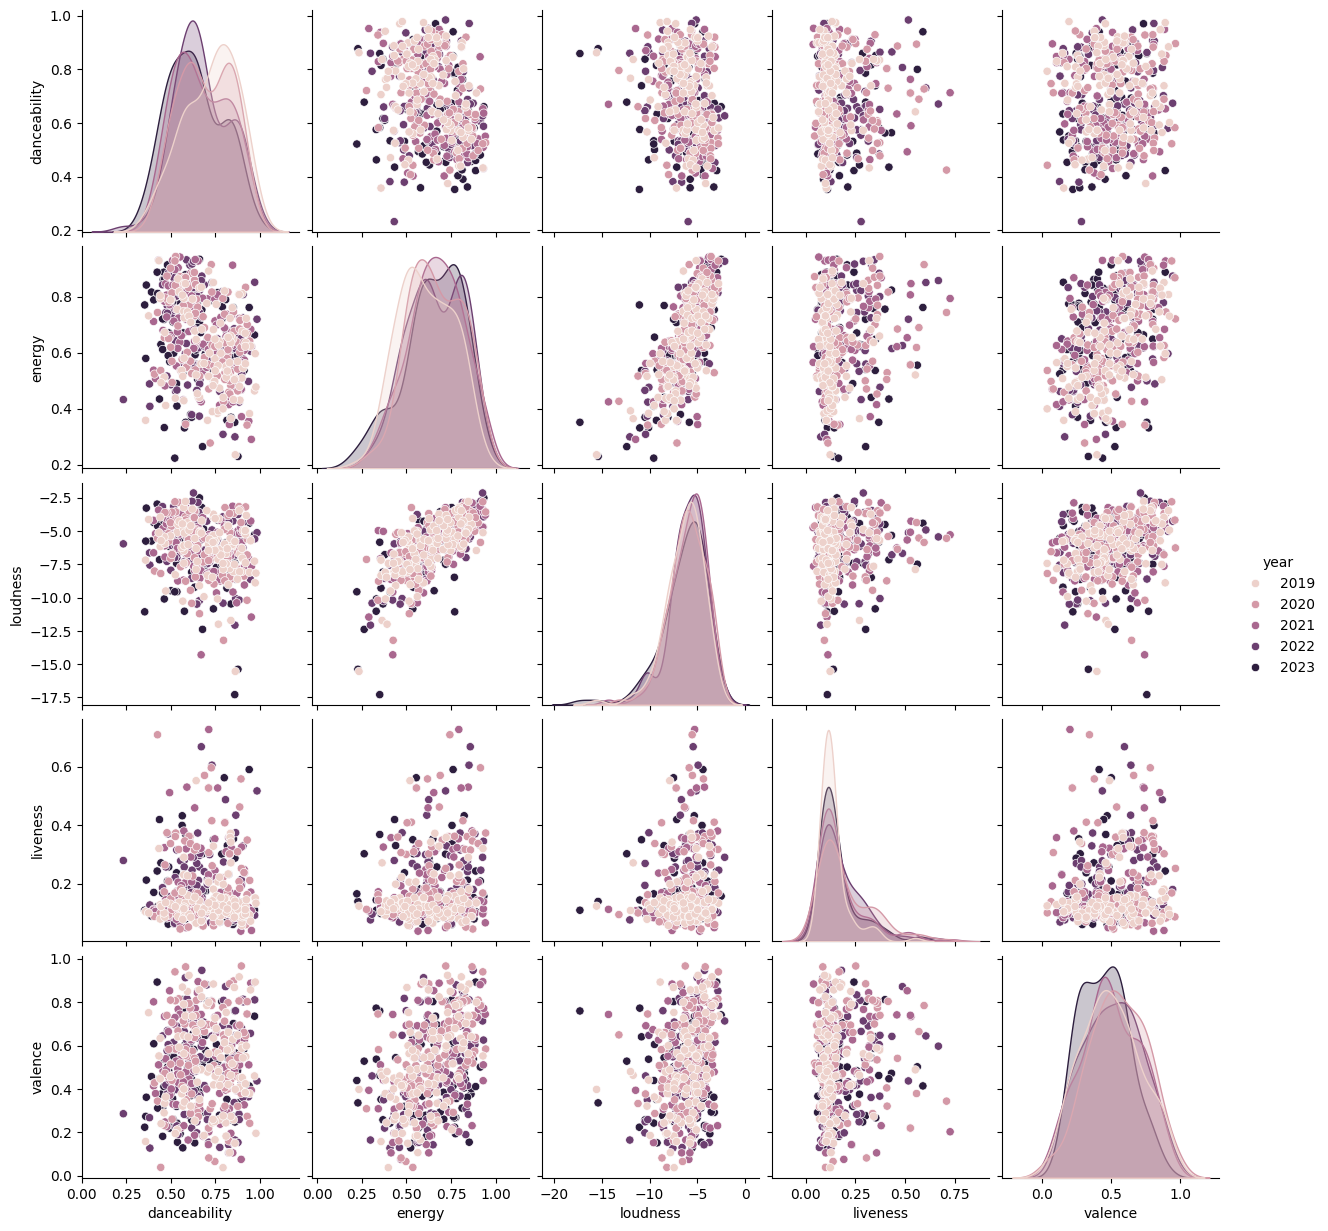

In [21]:
import seaborn as sns

plot_data = data[[
    'year',
    'danceability',
    'energy',
    'loudness',
    'liveness',
    'valence'
    ]]

# save labels to use later
song_names = data['track_name']
artist_names = data['artist']
years = data['year']

sns.pairplot(plot_data, hue='year')

## Principal Component Analysis
- using SVD

,PC1,PC2,PC3,song_name,artist_name,year
0,-0.648720,-0.557377,1.025055,’98 Braves,Morgan Wallen,2023
1,-1.355412,-1.179125,-0.537501,Need A Favor,Jelly Roll,2023
2,-1.597594,-0.757477,-0.794386,red (feat. Morgan Wallen),HARDY,2023
3,-0.264603,-0.516217,-0.456465,Religiously,Bailey Zimmerman,2023
4,-1.653151,-1.771833,0.078784,Try That In A Small Town,Jason Aldean,2023
...,...,...,...,...,...,...
495,-1.848686,-1.164649,-0.534464,All On You,Mitchell Tenpenny,2019
496,0.881054,0.387180,-0.773236,Water on Water on Water,Young Dolph,2019
497,-1.340985,0.734653,-1.076931,Keanu Reeves,Logic,2019
498,0.330772,0.421615,-0.715711,Facts,Kevin Gates,2019


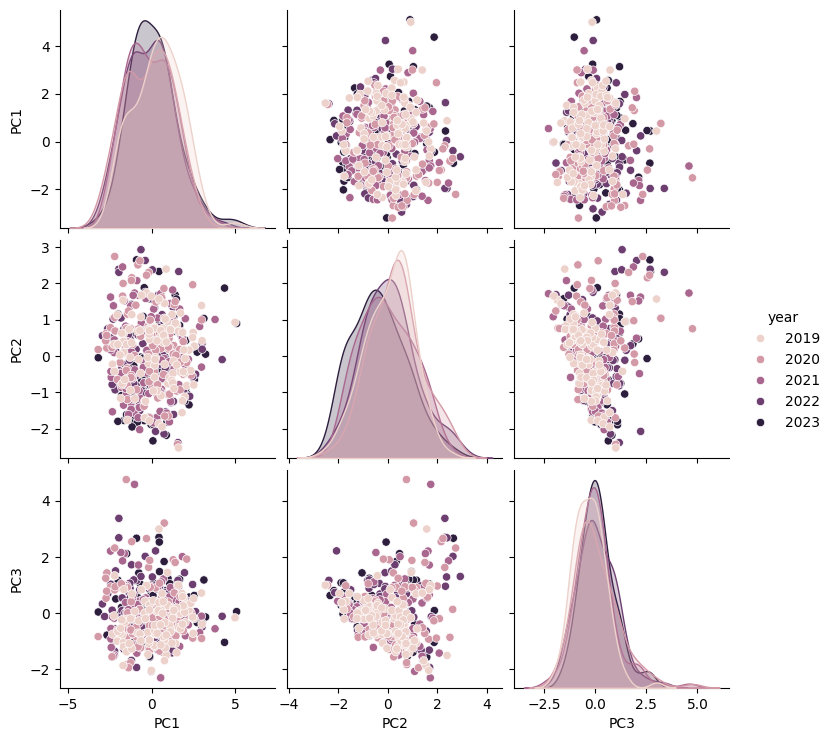

In [16]:
# Scale the data
X = scale(plot_data.drop(['year'], axis=1))

pca = decomposition.PCA(n_components=3)

pca.fit(X)

scores = pca.transform(X) 

scores_df = pd.DataFrame(scores, columns = ['PC1', 'PC2', 'PC3'])

scores_df['song_name'] = song_names
scores_df['artist_name'] = artist_names
scores_df['year'] = years

scores_df.reindex(columns = ['song_name', 'artist_name', 'year', 'PC1', 'PC2', 'PC3'])

display(scores_df)
sns.pairplot(scores_df, hue='year')

In [17]:
loadings = pca.components_.T 

loadings_df = pd.DataFrame(
    loadings, 
    columns=['PC1', 'PC2', 'PC3'], 
    index=plot_data.drop(['year'],axis=1).columns
    )

loadings_df

,PC1,PC2,PC3
danceability,0.286675,0.678492,-0.302865
energy,-0.636712,-0.017690,-0.065124
loudness,-0.589309,-0.119927,-0.039598
liveness,-0.162476,0.500520,0.847655
valence,-0.372468,0.523862,-0.428888


### Scree Plot

Explained Variance: [0.41260017 0.22674561 0.1835205 ]
Cumulative Variance: [0.413 0.64  0.824]


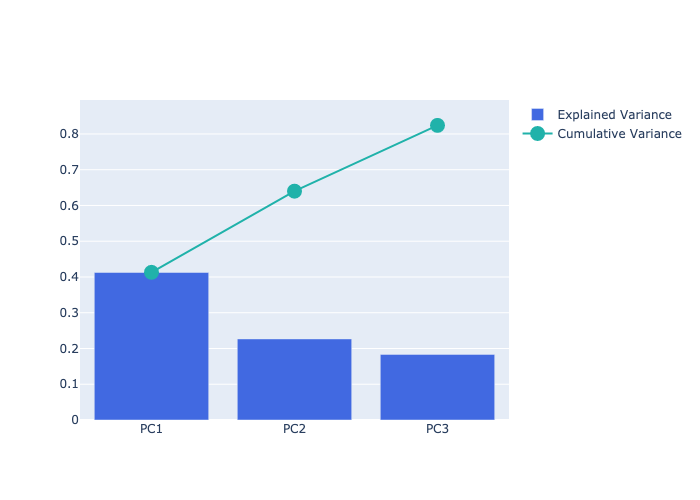

In [18]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance:", explained_variance)

cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))
print("Cumulative Variance:", cumulative_variance)

fig = go.Figure()

df_explained_variance = pd.DataFrame(
    {
        'PC': ['PC1','PC2','PC3'],
        'Explained Variance': explained_variance,
        'Cumulative Variance': cumulative_variance
    }
)

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue"),
        name='Explained Variance'
    ))

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen"),
        name='Cumulative Variance'
    ))

fig.show("png")

## K-Means

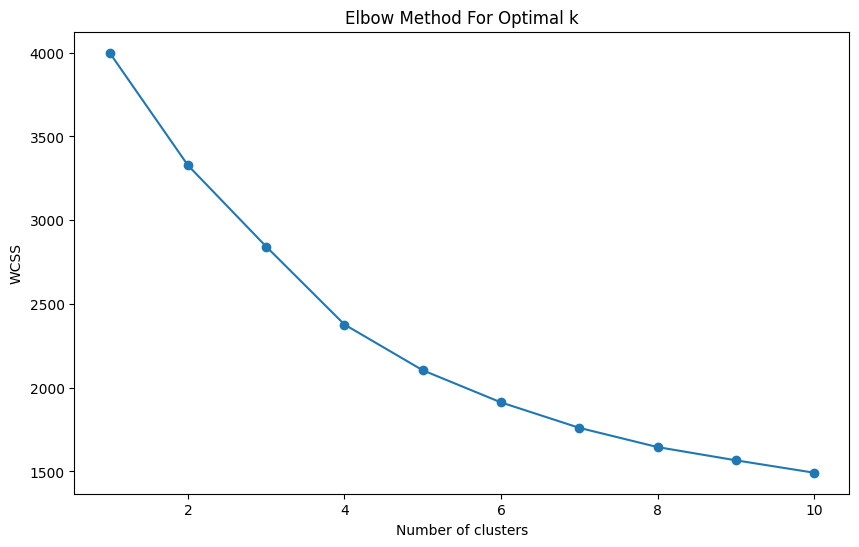

In [23]:
audio_features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[audio_features])

# Determining the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

Let's choose 4 clusters based on elbow method.

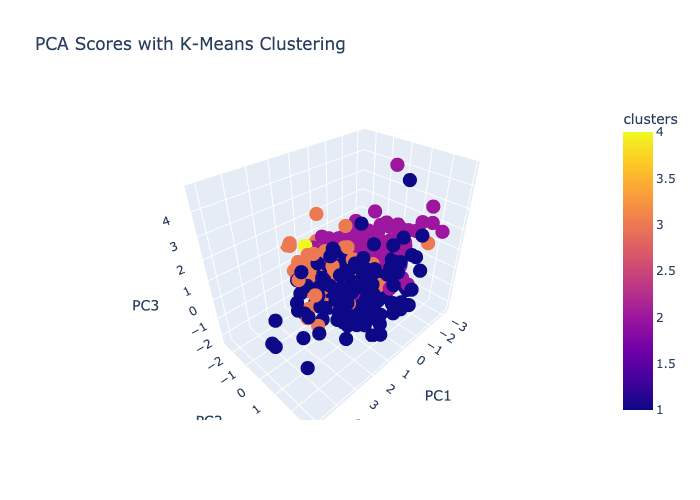

In [29]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_features)

scores_df['clusters'] = cluster_labels + 1

fig = px.scatter_3d(
    scores_df,
    x='PC1',
    y='PC2',
    z='PC3',
    color='clusters',
    hover_data=scores_df.columns,
    title='PCA Scores with K-Means Clustering'
)
fig.to_html('pca_scores_3d.html')
fig.show("png")
fig.show()


It's interesting to see the PCs colored by cluster. After taking a look at some of the features of these groupings, it seems to correspond with certain groupings of genres. Since I did not include genre labels in my data, I won't be adding it in, but for future reference it would be something interesting to look at.

In [499]:
scores_df.to_csv('PCA_and_KMeans_Results.csv')

## Hypothesis Testing

In [503]:
from scipy.stats import ttest_ind

# Audio features to test
audio_features = [
    'danceability', 
    'energy', 
    'loudness', 
    'speechiness', 
    'acousticness', 
    'instrumentalness', 
    'liveness', 
    'valence', 'tempo'
    ]

# Perform t-tests for 2019 vs 2020 and 2022 vs 2023
data_2019 = data[audio_features][data['year'] == '2019']
data_2020 = data[audio_features][data['year'] == '2020']
data_2022 = data[audio_features][data['year'] == '2022']
data_2023 = data[audio_features][data['year'] == '2023']

# Function to perform t-tests between years
def perform_t_tests(data1, data2, features):
    p_values = {}
    for feature in features:
        # Welch's T-Test
        stat, p_value = ttest_ind(data1[feature], data2[feature], equal_var=False)  
        p_values[feature] = round(p_value,4)
    return p_values

p_values_2019_2020 = perform_t_tests(data_2019, data_2020, audio_features)
p_values_2022_2023 = perform_t_tests(data_2022, data_2023, audio_features)

results = pd.DataFrame(
    [
        p_values_2019_2020, 
        p_values_2022_2023
     ],
     index=[
         'P-values 2019 vs 2020', 
         'P-values 2022 vs 2023'
    ]
)

results 

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
P-values 2019 vs 2020,0.1990,0.0160,0.2595,0.0062,0.9762,0.1659,0.0002,0.0971,0.6281
P-values 2022 vs 2023,0.0787,0.5797,0.1714,0.3857,0.5840,0.2880,0.1464,0.0381,0.8029


In [371]:
# reminding myself of the loadings from PCA
loadings_df

,PC1,PC2,PC3
danceability,0.286675,0.678492,-0.302865
energy,-0.636712,-0.017690,-0.065124
loudness,-0.589309,-0.119927,-0.039598
liveness,-0.162476,0.500520,0.847655
valence,-0.372468,0.523862,-0.428888


<Axes: xlabel='valence', ylabel='Density'>

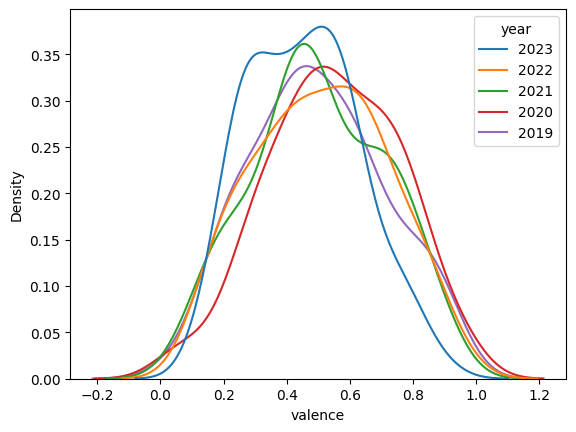

In [382]:
sns.kdeplot(data, x='valence', hue='year')

<Axes: xlabel='liveness', ylabel='Density'>

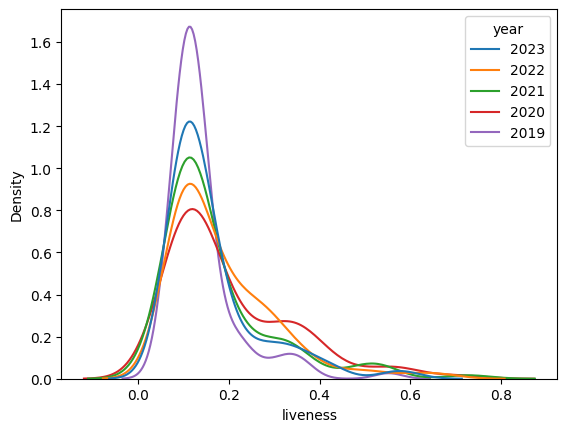

In [383]:
sns.kdeplot(data, x='liveness', hue='year')

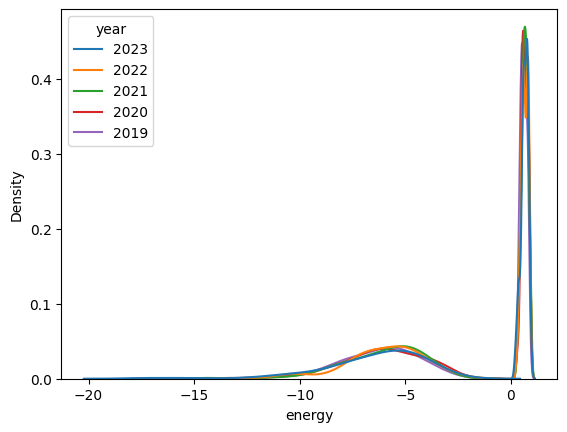

In [386]:
sns.kdeplot(data, x='energy', hue='year')

<Axes: xlabel='loudness', ylabel='Density'>

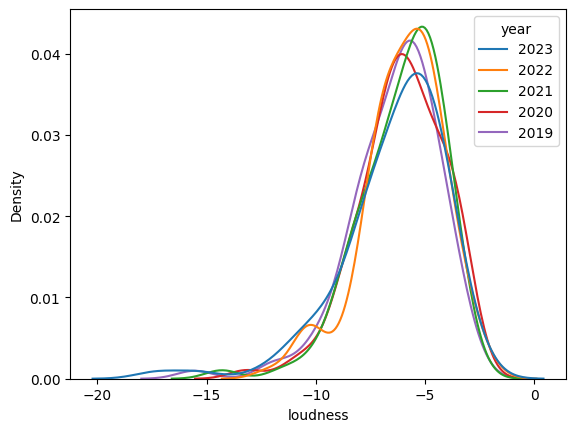

In [388]:
sns.kdeplot(data, x='loudness', hue='year')

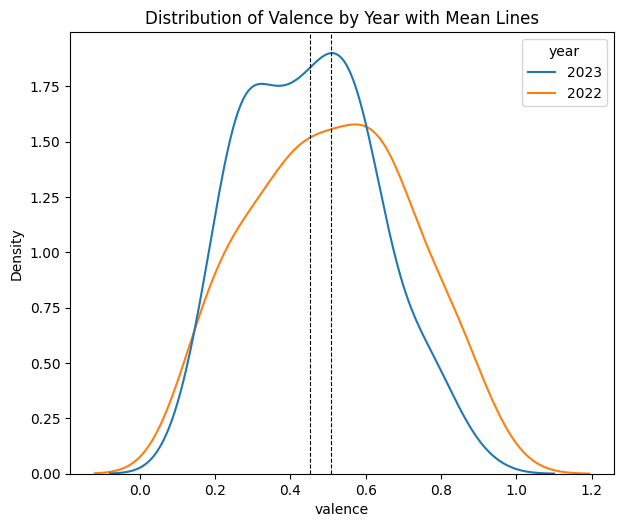

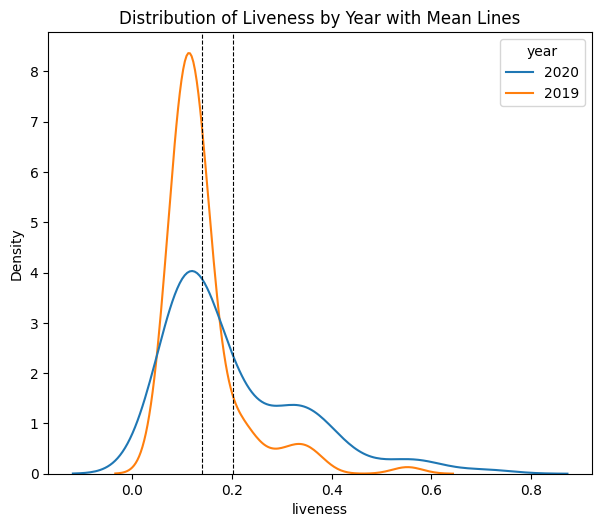

In [422]:
data_2019_2020 = data[data['year'].isin(['2019','2020'])]
data_2022_2023 = data[data['year'].isin(['2022','2023'])]

def compare_density_plots(df, field):
    ax = sns.kdeplot(data=df, x=field, hue='year', common_norm=False)

    for year in df['year'].unique():
        mean_val = df[df['year'] == year][field].mean()
        plt.axvline(mean_val, color='k', linestyle='--', linewidth=0.8)

    plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95)

    plt.title(f'Distribution of {field.title()} by Year with Mean Lines')
    return plt.show()

compare_density_plots(data_2022_2023, 'valence')
compare_density_plots(data_2019_2020, 'liveness')